In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
## Removing all rows with missing values
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df.shape

(18285, 5)

In [9]:
def create_distribution(feature):
    return sns.countplot(df[feature])

In [10]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [11]:
df.label = df.label.astype(str)

<AxesSubplot:xlabel='label', ylabel='count'>

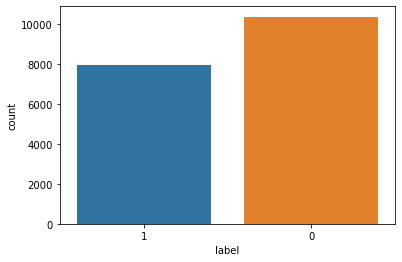

In [12]:
create_distribution("label")

In [13]:
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
messages = df.copy()

In [15]:
messages.reset_index(inplace=True)

In [16]:
messages.head(20)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [17]:
messages.drop(["index", "id"], axis=1, inplace=True)

In [18]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Preprocessing of the "title" feature

In [19]:
data = messages["title"][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [20]:
import re

In [22]:
## Removing special characters
re.sub("[^a-zA-Z]", " ", data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [23]:
data = data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [24]:
word_list = data.split()
word_list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [25]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [26]:
## To reduce the words to their root word
ps = PorterStemmer()

In [27]:
review = [ps.stem(word) for word in word_list if word not in set(stopwords.words("english"))]
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [28]:
" ".join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [29]:
sentences = []
corpus = []
for i in range(len(messages)):
    data = re.sub("[^a-zA-Z]", " ", messages["title"][i])
    data = data.lower()
    data = data.split()
    data = [ps.stem(word) for word in data if word not in set(stopwords.words("english"))]
    sentences = " ".join(data)
    corpus.append(sentences)

In [30]:
corpus[100]

'snap share leap debut investor doubt valu vanish new york time'

### Applying bag of words technique on the corpus data

In [ ]:
## We can use bag of words or TF-Idf techniques to transform the text into vector representation

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [36]:
X = cv.fit_transform(corpus).toarray()

In [37]:
X.shape

(18285, 5000)

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
cv.get_feature_names()

['000',
 '000 email',
 '000 job',
 '00pm',
 '00pm water',
 '00pm water cooler',
 '01',
 '10',
 '10 000',
 '10 year',
 '100',
 '100 000',
 '100 day',
 '100 million',
 '1000',
 '100percentfedup',
 '100percentfedup com',
 '11',
 '11 16',
 '11 2016',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '16 year',
 '17',
 '18',
 '19',
 '1b',
 '1st',
 '20',
 '20 year',
 '200',
 '2006',
 '2008',
 '2014',
 '2015',
 '2016',
 '2016 breitbart',
 '2016 elect',
 '2016 new',
 '2016 new york',
 '2016 presidenti',
 '2016 video',
 '2017',
 '2018',
 '2020',
 '20k',
 '20th',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '30',
 '300',
 '31',
 '33',
 '35',
 '36',
 '40',
 '400',
 '42',
 '45',
 '47',
 '50',
 '50 000',
 '500',
 '60',
 '65',
 '650',
 '70',
 '700',
 '72',
 '75',
 '76',
 '78',
 '80',
 '800',
 '82',
 '83',
 '84',
 '85',
 '87',
 '90',
 '91',
 '94',
 '94 new',
 '94 new york',
 '95',
 '98',
 '99',
 '9th',
 'abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort

In [46]:
messages.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [47]:
y = messages["label"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Applying a machine learning algorithm 

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
classifier = MultinomialNB()

In [52]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
predictions = classifier.predict(X_test)
predictions

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
accuracy_score(y_test, predictions)

0.8952318460192475

In [57]:
cm = confusion_matrix(y_test, predictions)
cm

array([[2307,  293],
       [ 186, 1786]], dtype=int64)

In [ ]:
## Let's make this confusion matrix more freiendly 

In [66]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("confusion matrix")
    labels = ["positive", "negative"]
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)

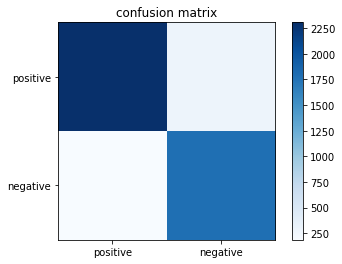

In [67]:
plot_confusion_matrix(cm)

### Applying other classifiers algorithm

In [68]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [69]:
linear_clf = PassiveAggressiveClassifier()

In [70]:
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [71]:
pred = linear_clf.predict(X_test)

In [72]:
accuracy_score(y_test, pred)

0.9072615923009624

In [74]:
cm2 = confusion_matrix(y_test, pred)
cm2

array([[2346,  254],
       [ 170, 1802]], dtype=int64)

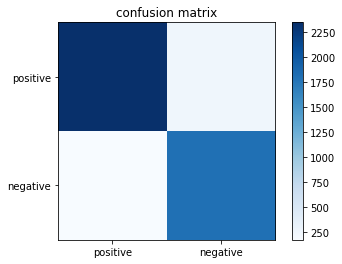

In [75]:
plot_confusion_matrix(cm2)

In [76]:
linear_clf.coef_

array([[0.83384595, 0.16339699, 0.        , ..., 0.16144212, 0.15951085,
        0.13112257]])

In [83]:
classifier.coef_.shape

(1, 5000)

In [85]:
feature_names = cv.get_feature_names()
feature_names

['000',
 '000 email',
 '000 job',
 '00pm',
 '00pm water',
 '00pm water cooler',
 '01',
 '10',
 '10 000',
 '10 year',
 '100',
 '100 000',
 '100 day',
 '100 million',
 '1000',
 '100percentfedup',
 '100percentfedup com',
 '11',
 '11 16',
 '11 2016',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '16 year',
 '17',
 '18',
 '19',
 '1b',
 '1st',
 '20',
 '20 year',
 '200',
 '2006',
 '2008',
 '2014',
 '2015',
 '2016',
 '2016 breitbart',
 '2016 elect',
 '2016 new',
 '2016 new york',
 '2016 presidenti',
 '2016 video',
 '2017',
 '2018',
 '2020',
 '20k',
 '20th',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '30',
 '300',
 '31',
 '33',
 '35',
 '36',
 '40',
 '400',
 '42',
 '45',
 '47',
 '50',
 '50 000',
 '500',
 '60',
 '65',
 '650',
 '70',
 '700',
 '72',
 '75',
 '76',
 '78',
 '80',
 '800',
 '82',
 '83',
 '84',
 '85',
 '87',
 '90',
 '91',
 '94',
 '94 new',
 '94 new york',
 '95',
 '98',
 '99',
 '9th',
 'abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort

In [87]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[0:20]

[(-3.9670307218470633, 'trump'),
 (-4.378947465236717, 'clinton'),
 (-4.454550205979667, 'hillari'),
 (-5.030884377149999, 'elect'),
 (-5.214448942183551, 'new'),
 (-5.2332818905166425, 'comment'),
 (-5.300104386762045, 'video'),
 (-5.367356613771212, 'war'),
 (-5.371713919140167, 'hillari clinton'),
 (-5.407273221176655, 'us'),
 (-5.411808376342045, 'fbi'),
 (-5.507118556146371, 'vote'),
 (-5.563688907634765, 'obama'),
 (-5.568993959864458, 'world'),
 (-5.585080097616083, 'email'),
 (-5.717839587462024, 'donald'),
 (-5.7491901173460995, 'donald trump'),
 (-5.821829300986071, 'russia'),
 (-5.870961989563716, 'america'),
 (-5.907596122743496, '2016')]